In [2]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [3]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
def bigGraph(df, columnName, rnd=0):
    data = pd.Series(df_init[columnName])
    hist = thinkstats2.Hist(round(data, rnd))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    thinkplot.PrePlot(4, rows =2, cols=2)#this says that we are plotting 4 things and we wante it sorted in 2 rows and 2 columns
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2)
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

In [5]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [6]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [7]:
print (df['Earnings_1974'].describe())


count    15992.000000
mean     14016.800304
std       9569.795893
min          0.000000
25%       4403.452250
50%      15123.580000
75%      23584.180000
max      25862.320000
Name: Earnings_1974, dtype: float64


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

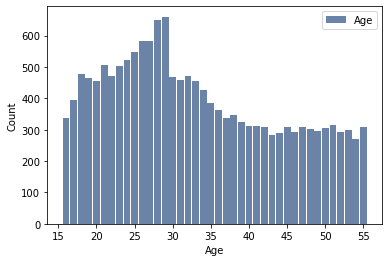

In [8]:
hist=thinkstats2.Hist(round(df['Age'],0), label='Age')
thinkplot.Hist(hist)
thinkplot.Config( xlabel='Age' , ylabel='Count')






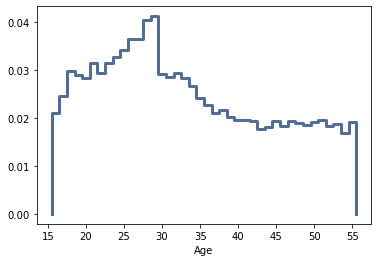

<Figure size 576x432 with 0 Axes>

In [9]:
agepmf=thinkstats2.Pmf(df['Age'])
thinkplot.Pmf(agepmf)
thinkplot.Show( xlabel='Age')


#### What fraction of the people in the data are 51? What fraction are older than 51?

In [10]:
Age=thinkstats2.Cdf(df['Age'])
print('Fraction of people who are 51:', round(Age.Prob(52)-Age.Prob(50),2))
print('Fraction of people who are older than 51:',round(1-Age.Prob(51),2))

Fraction of people who are 51: 0.04
Fraction of people who are older than 51: 0.07


##### What is the median age?

In [52]:
print('Median age:',df['Age'].median())
print('Median age:',Age.Value(.5))


Median age: 31.0
Median age: 31


##### Does the distribution of the sample data seem to mirror the working age population?

# in 1978 the retirement age was 70. this data does to some extent mirror the working age population but, it is missing data from individuals between the ages of 55 and 70. 

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [12]:
#This sample is not a representive sample of the whole US polpulation as it excludes individuals above 55 years of age and below 16 years. 
#This sample is the representation of the US population between the ages of 15-55 from different education backgrounds and marital status
#  but, does not include individuals who make more than 25000. 

In [13]:
print (df['Eduacation'].value_counts())


HighSchool            6252
LessThanHighSchool    4731
Intermediate          2708
graduate              1367
PostGraduate           934
Name: Eduacation, dtype: int64


In [14]:
print(df['Race'].value_counts())


NotBlack    14816
black        1176
Name: Race, dtype: int64


In [15]:
print (df['Hisp'].value_counts())

NotHispanic    14840
hispanic        1152
Name: Hisp, dtype: int64


In [16]:
print (df['MaritalStatus'].value_counts())

Married       11382
NotMarried     4610
Name: MaritalStatus, dtype: int64


In [54]:
print (df['Earnings_1974'].describe(),'\n')
print (df['Earnings_1975'].describe(), '\n')
print (df['Earnings_1978'].describe())


count    15992.000000
mean     14016.800304
std       9569.795893
min          0.000000
25%       4403.452250
50%      15123.580000
75%      23584.180000
max      25862.320000
Name: Earnings_1974, dtype: float64 

count    15992.000000
mean     13650.803376
std       9270.403225
min          0.000000
25%       4398.823000
50%      14557.110000
75%      22923.737500
max      25243.550000
Name: Earnings_1975, dtype: float64 

count    15992.000000
mean     14846.659673
std       9647.391524
min          0.000000
25%       5669.298000
50%      16421.975000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64


In [53]:
print ('Individuals with no degree:',df['Nodeg'].sum())
print('Educated individuals:',df['Nodeg'].count()-df['Nodeg'].sum())

Individuals with no degree: 4731
Educated individuals: 11261


##### Demographic Conclusion


### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

c:\Users\taraz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\taraz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\taraz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Earnings_1978', ylabel='Density'>

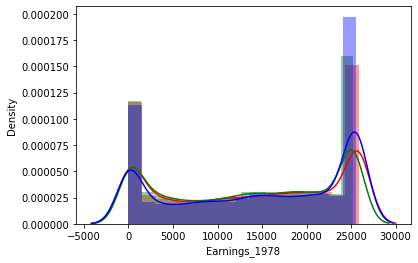

In [55]:
sns.distplot(df['Earnings_1974'], color='red')
sns.distplot(df['Earnings_1975'], color='green')
sns.distplot(df['Earnings_1978'], color='blue')
#The graph shows 2 peaks for the population in the dataset which is at 0$ income and 25000$. 
#all 3 years reflect the same pattern.In 1978 the number of people earning about 25000 dollars increased compared to 1974

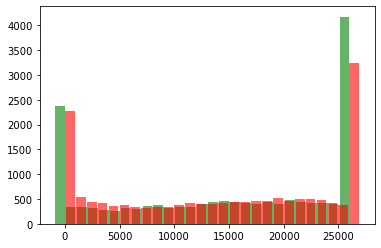

In [56]:
hist1978=thinkstats2.Hist(round(df['Earnings_1978'],-3))
hist1974=thinkstats2.Hist(round(df['Earnings_1974'],-3))
width=22
thinkplot.PrePlot(2)
thinkplot.Hist(hist1978, align='right', color='green')
thinkplot.Hist(hist1974, align='left', color='red')
#This confirms that skightly more people are not earning any income while a significant number of individuals are making around 25000$ in 1978

In [57]:
deg=df[df['Nodeg']==0]
nodeg=df[df['Nodeg']==1]
print('Mean value of earning of individuals with a degree:',(deg['Earnings_1978'].mean()))
print('Mean value of earning of individuals with no degree:',nodeg['Earnings_1978'].mean())
print('Effect size of degree:',(CohenEffectSize(deg['Earnings_1978'],nodeg['Earnings_1978'])))


Mean value of earning of individuals with a degree: 15796.747484376683
Mean value of earning of individuals with no degree: 12585.205679044797
Effect size of degree: 0.3367928897615812


In [58]:
black=df[df['Race']=='black']
not_black=df[df['Race']=='NotBlack']
print('Mean value of earning of black individuals:',black['Earnings_1978'].mean())
print('Mean value of earning of not-black individuals:',not_black['Earnings_1978'].mean())
print('Effect size of skin color:',CohenEffectSize(not_black['Earnings_1978'],black['Earnings_1978']))

Mean value of earning of black individuals: 12006.68295142261
Mean value of earning of not-black individuals: 15072.07899151205
Effect size of skin color: 0.31883255859070525


In [59]:

married=df[df["MaritalStatus"]=="Married"]
notmarried=df[df["MaritalStatus"]=="NotMarried"]
print('Mean value of earning of married individuals:',married['Earnings_1978'].mean())
print('Mean value of earning of not-married individuals:',notmarried['Earnings_1978'].mean())
print('Effect size of Marital status:',CohenEffectSize(married['Earnings_1978'], notmarried["Earnings_1978"]))
#Marital status has the biggest effect size


Mean value of earning of married individuals: 16390.997167012894
Mean value of earning of not-married individuals: 11033.720549714462
Effect size of Marital status: 0.5737396692403472


In [60]:
hispanic=df[df['Hisp']=="hispanic"]
not_hispanic=df[df['Hisp']=="NotHispanic"]
print('Mean value of earning of hispanic individuals:',hispanic['Earnings_1978'].mean())
print('Mean value of earning of not-hispanic individuals:',not_hispanic['Earnings_1978'].mean())
print('Effect size of Marital status:',CohenEffectSize(not_hispanic['Earnings_1978'],hispanic['Earnings_1978']))

Mean value of earning of hispanic individuals: 13396.677887994774
Mean value of earning of not-hispanic individuals: 14959.218905804977
Effect size of Marital status: 0.16210284395555566


In [61]:
low_income1974=df[df['Earnings_1974']<5000]
high_income11974=df[df['Earnings_1974']>20000]
low_income1974['MaritalStatus'].value_counts()

NotMarried    2421
Married       1792
Name: MaritalStatus, dtype: int64

In [62]:
low_income1978=df[df['Earnings_1978']<5000]
high_income1978=df[df['Earnings_1978']>20000]
low_income1978['MaritalStatus'].value_counts()

Married       2340
NotMarried    1481
Name: MaritalStatus, dtype: int64

In [63]:
print(notmarried.describe())
print(notmarried.median())

               Age        Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
count  4610.000000  4610.000000    4610.000000    4610.000000    4610.000000
mean     25.591974     0.345553    7681.534905    7899.741012   11033.720550
std       9.849678     0.475600    8325.019159    8038.337295    8669.880629
min      16.000000     0.000000       0.000000       0.000000       0.000000
25%      18.000000     0.000000     386.465400     963.641100    2965.797500
50%      22.000000     0.000000    4325.081500    4950.242000    9982.043000
75%      29.000000     1.000000   12987.490000   13198.260000   17812.145000
max      55.000000     1.000000   25862.320000   25243.550000   25564.670000
Age                22.0000
Nodeg               0.0000
Earnings_1974    4325.0815
Earnings_1975    4950.2420
Earnings_1978    9982.0430
dtype: float64


C:\Users\taraz\AppData\Local\Temp\ipykernel_13204\2862222316.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(notmarried.median())


In [64]:
youngadult=notmarried[notmarried['Age']>20]
print(youngadult.describe())
print(youngadult.median())

               Age        Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
count  2724.000000  2724.000000    2724.000000    2724.000000    2724.000000
mean     30.854258     0.184288   11462.858579   11121.383480   12929.683883
std       9.759562     0.387790    8663.304138    8562.587092    9331.181546
min      21.000000     0.000000       0.000000       0.000000       0.000000
25%      23.000000     0.000000    3541.864750    3167.080750    3518.836000
50%      27.000000     0.000000   10546.735000   10418.780000   13408.890000
75%      36.000000     0.000000   18776.630000   18100.160000   22029.210000
max      55.000000     1.000000   25862.320000   25243.550000   25564.670000
Age                 27.000
Nodeg                0.000
Earnings_1974    10546.735
Earnings_1975    10418.780
Earnings_1978    13408.890
dtype: float64


C:\Users\taraz\AppData\Local\Temp\ipykernel_13204\3910732341.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(youngadult.median())


In [65]:
print(married.describe())
print(married.median())

                Age         Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
count  11382.000000  11382.000000   11382.000000   11382.000000   11382.000000
mean      36.316904      0.275698   16582.744206   15980.130164   16390.997167
std        9.948024      0.446885    8818.606906    8704.060334    9594.652211
min       16.000000      0.000000       0.000000       0.000000       0.000000
25%       28.000000      0.000000   10237.660000    9612.689750    8446.316000
50%       35.000000      0.000000   18677.690000   17982.895000   19664.850000
75%       45.000000      1.000000   25781.500000   24985.740000   25564.670000
max       55.000000      1.000000   25862.320000   25243.550000   25564.670000
Age                 35.000
Nodeg                0.000
Earnings_1974    18677.690
Earnings_1975    17982.895
Earnings_1978    19664.850
dtype: float64


C:\Users\taraz\AppData\Local\Temp\ipykernel_13204\2790928429.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(married.median())


##### Plot Earnings Data

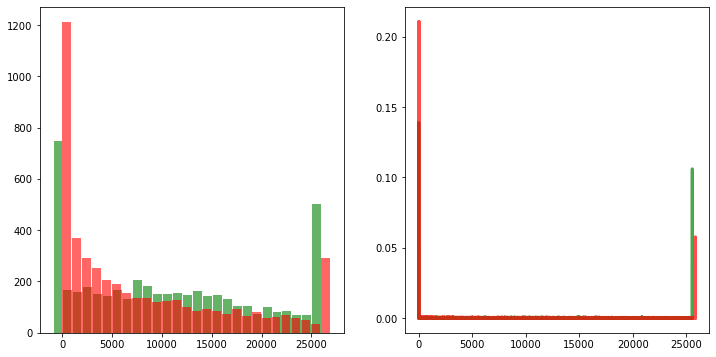

In [66]:
histn=thinkstats2.Hist(round(notmarried["Earnings_1978"],-3))
histno=thinkstats2.Hist(round(notmarried["Earnings_1974"],-3))
pmfn=thinkstats2.Pmf(notmarried['Earnings_1978'],-3)
pmfno=thinkstats2.Pmf(notmarried['Earnings_1974'],-3)
width=2
thinkplot.PrePlot(2,1,2)
thinkplot.SubPlot(1)
thinkplot.Hist(histn, align='right', color='green')
thinkplot.Hist(histno, align='left', color='red')
thinkplot.SubPlot(2)
thinkplot.Pmf(pmfn, color='green')
thinkplot.Pmf(pmfno, color='red')

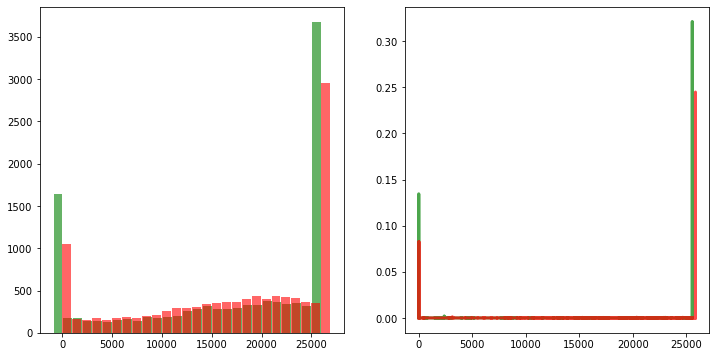

In [67]:
histm=thinkstats2.Hist(round(married["Earnings_1978"],-3), label='1978')
histma=thinkstats2.Hist(round(married["Earnings_1974"],-3), label='1974')
pmfm=thinkstats2.Pmf(married['Earnings_1978'],-3)
pmfma=thinkstats2.Pmf(married['Earnings_1974'],-3)
width=2
thinkplot.PrePlot(2,1,2)
thinkplot.SubPlot(1)
thinkplot.Hist(histm, align='right', color='green')
thinkplot.Hist(histma, align='left', color='red')
thinkplot.SubPlot(2)
thinkplot.Pmf(pmfm, color='green')
thinkplot.Pmf(pmfma, color='red')


As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 

##### What to Investigate Further


In [ ]:
#part of this could be related to not married individuals graduating and enterign the job market. when we look at the young adult
#population the income increases significantly
#economy situation, there may have been more demand for workforce and as a reslt the number of people making higher income has increased

##### Histogram and PMF

In [44]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

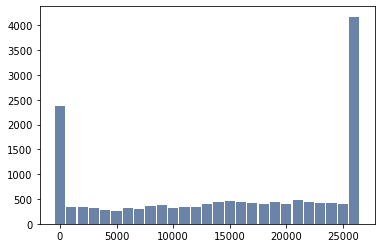

In [45]:
hist_1978=thinkstats2.Hist(round(df['Earnings_1978'],-3),label='Earnings_1978')
thinkplot.Hist(hist_1978)


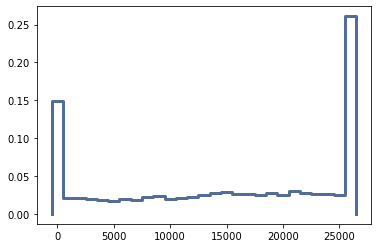

In [46]:
pmf_1978=thinkstats2.Pmf(round(df['Earnings_1978'],-3), label='Earnings_1978')
thinkplot.Pmf(pmf_1978)

c:\Users\taraz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\taraz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Earnings_1978', ylabel='Density'>

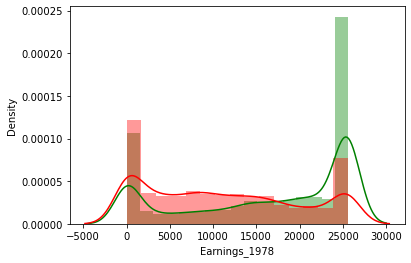

In [68]:
sns.distplot(married['Earnings_1978'], color='green')
sns.distplot(notmarried['Earnings_1978'], color='red' )

##### Differences in Median Income, and Theory on Why


In [ ]:
print('Married Median:', married['Earnings_1978'].median())
print('Not-married Median:', notmarried['Earnings_1978'].median())

In [ ]:
#The differences might also be associated to how the income is reported per household or individually. As married individuals on average 

##### Outliers

In [47]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [48]:
outliers = find_outliers_IQR(df['Earnings_1978'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Earnings_1978, dtype: float64)

##### Outlier Conclusions


In [51]:
#there are no outliers in this dataset 